In [1]:
from Priestlytaylor import model_priestlytaylor

In [2]:
# coding: utf8
from datetime import datetime
from math import *
from Netradiation import model_netradiation
from Netradiationequivalentevaporation import model_netradiationequivalentevaporation
from Priestlytaylor import model_priestlytaylor
from Conductance import model_conductance
from Diffusionlimitedevaporation import model_diffusionlimitedevaporation
from Penman import model_penman
from Ptsoil import model_ptsoil
from Soilevaporation import model_soilevaporation
from Evapotranspiration import model_evapotranspiration
from Soilheatflux import model_soilheatflux
from Potentialtranspiration import model_potentialtranspiration
from Cropheatflux import model_cropheatflux
from Canopytemperature import model_canopytemperature

def model_energybalance(minTair = 0.7,
         maxTair = 7.2,
         albedoCoefficient = 0.23,
         stefanBoltzman = 4.903e-09,
         elevation = 11,
         solarRadiation = 3.0,
         vaporPressure = 6.1,
         extraSolarRadiation = 11.7,
         lambdaV = 2.454,
         hslope = 0.584,
         psychrometricConstant = 0.66,
         Alpha = 1.5,
         vonKarman = 0.42,
         heightWeatherMeasurements = 2.0,
         zm = 0.13,
         d = 0.67,
         zh = 0.013,
         plantHeight = 0.0,
         wind = 124000.0,
         deficitOnTopLayers = 5341.0,
         soilDiffusionConstant = 4.2,
         VPDair = 2.19,
         rhoDensityAir = 1.225,
         specificHeatCapacityAir = 0.00101,
         tau = 0.9983,
         tauAlpha = 0.3,
         isWindVpDefined = 0):
    """
     - Description:
                 * Title: EnergyBalance
                 * Author: Pierre MARTRE
                 * Reference: Modelling energy balance in the wheat crop model SiriusQuality2: Evapotranspiration and canopy and soil temperature calculations
                 * Institution: INRA/LEPSE
                 * Abstract: see documentation at http://www1.clermont.inra.fr/siriusquality/?page_id=547
     - inputs:
                 * name: minTair
                               ** description : minimum air temperature
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** min : -30
                               ** max : 45
                               ** default : 0.7
                               ** unit : °C
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: maxTair
                               ** description : maximum air Temperature
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** min : -30
                               ** max : 45
                               ** default : 7.2
                               ** unit : °C
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: albedoCoefficient
                               ** description : albedo Coefficient
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 0.23
                               ** min : 0
                               ** max : 1
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: stefanBoltzman
                               ** description : stefan Boltzman constant
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 4.903E-09
                               ** min : 0
                               ** max : 1
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: elevation
                               ** description : elevation
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 0
                               ** min : -500
                               ** max : 10000
                               ** unit : m
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: solarRadiation
                               ** description : solar Radiation
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** default : 3
                               ** min : 0
                               ** max : 1000
                               ** unit : MJ m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: vaporPressure
                               ** description : vapor Pressure
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** default : 6.1
                               ** min : 0
                               ** max : 1000
                               ** unit : hPa
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: extraSolarRadiation
                               ** description : extra Solar Radiation
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** default : 11.7
                               ** min : 0
                               ** max : 1000
                               ** unit : MJ m2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: lambdaV
                               ** description : latent heat of vaporization of water
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 2.454
                               ** min : 0
                               ** max : 10
                               ** unit : MJ kg-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: hslope
                               ** description : the slope of saturated vapor pressure temperature curve at a given temperature 
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** default : 0.584
                               ** min : 0
                               ** max : 1000
                               ** unit : hPa °C-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: psychrometricConstant
                               ** description : psychrometric constant
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 0.66
                               ** min : 0
                               ** max : 1
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: Alpha
                               ** description : Priestley-Taylor evapotranspiration proportionality constant
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 1.5
                               ** min : 0
                               ** max : 100
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: vonKarman
                               ** description : von Karman constant
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 1
                               ** default : 0.42
                               ** unit :  
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                               ** parametercategory : constant
                 * name: heightWeatherMeasurements
                               ** description : reference height of wind and humidity measurements
                               ** parametercategory : soil
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 10
                               ** default : 2
                               ** unit : m
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: zm
                               ** description : roughness length governing momentum transfer, FAO
                               ** parametercategory : constant
                               ** inputtype : parameter
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 1
                               ** default : 0.13
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: d
                               ** description : corresponding to 2/3. This is multiplied to the crop heigth for calculating the zero plane displacement height, FAO
                               ** inputtype : parameter
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 0.67
                               ** min : 0
                               ** max : 1
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547rl
                 * name: zh
                               ** description : roughness length governing transfer of heat and vapour, FAO
                               ** parametercategory : constant
                               ** inputtype : parameter
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 1
                               ** default : 0.013
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: plantHeight
                               ** description : plant Height
                               ** datatype : DOUBLE
                               ** default : 0
                               ** min : 0
                               ** max : 1000
                               ** unit : mm
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                               ** variablecategory : auxiliary
                 * name: wind
                               ** description : wind
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** default : 124000
                               ** min : 0
                               ** max : 1000000
                               ** unit : m d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: deficitOnTopLayers
                               ** description : deficit On TopLayers
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** default : 5341
                               ** min : 0
                               ** max : 10000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: soilDiffusionConstant
                               ** description : soil Diffusion Constant
                               ** parametercategory : soil
                               ** datatype : DOUBLE
                               ** default : 4.2
                               ** min : 0
                               ** max : 10
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: VPDair
                               ** description :  vapour pressure density
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** default : 2.19
                               ** min : 0
                               ** max : 1000
                               ** unit : hPa
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : variable
                 * name: rhoDensityAir
                               ** description : Density of air
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 1.225
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: specificHeatCapacityAir
                               ** description : Specific heat capacity of dry air
                               ** parametercategory : constant
                               ** datatype : DOUBLE
                               ** default : 0.00101
                               ** min : 0
                               ** max : 1
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: tau
                               ** description : plant cover factor
                               ** parametercategory : species
                               ** datatype : DOUBLE
                               ** default : 0.9983
                               ** min : 0
                               ** max : 100
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: tauAlpha
                               ** description : Fraction of the total net radiation exchanged at the soil surface when AlpaE = 1
                               ** parametercategory : soil
                               ** datatype : DOUBLE
                               ** default : 0.3
                               ** min : 0
                               ** max : 1
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
                 * name: isWindVpDefined
                               ** description : if wind and vapour pressure are defined
                               ** parametercategory : constant
                               ** datatype : INT
                               ** default : 1
                               ** min : 0
                               ** max : 1
                               ** unit : 
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                               ** inputtype : parameter
     - outputs:
                 * name: netRadiation
                               ** description :  net radiation 
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 5000
                               ** unit : MJ m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: netOutGoingLongWaveRadiation
                               ** description : net OutGoing Long Wave Radiation 
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 5000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: netRadiationEquivalentEvaporation
                               ** variablecategory : auxiliary
                               ** description : net Radiation in Equivalent Evaporation 
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 5000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: evapoTranspirationPriestlyTaylor
                               ** description : evapoTranspiration of Priestly Taylor 
                               ** variablecategory : rate
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 10000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: diffusionLimitedEvaporation
                               ** description : the evaporation from the diffusion limited soil 
                               ** variablecategory : state
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 5000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: energyLimitedEvaporation
                               ** description : energy Limited Evaporation 
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 5000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: conductance
                               ** description : the boundary layer conductance
                               ** variablecategory : state
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 10000
                               ** unit : m d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: evapoTranspirationPenman
                               ** description :  evapoTranspiration of Penman Monteith
                               ** variablecategory : rate
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 5000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: soilEvaporation
                               ** description : soil Evaporation
                               ** variablecategory : auxiliary
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 5000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: evapoTranspiration
                               ** description : evapoTranspiration
                               ** variablecategory : rate
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 10000
                               ** unit : mm
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: potentialTranspiration
                               ** description : potential Transpiration 
                               ** variablecategory : rate
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 10000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: soilHeatFlux
                               ** description : soil Heat Flux 
                               ** variablecategory : rate
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 10000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: cropHeatFlux
                               ** description :  crop Heat Flux
                               ** variablecategory : rate
                               ** datatype : DOUBLE
                               ** min : 0
                               ** max : 10000
                               ** unit : g m-2 d-1
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: minCanopyTemperature
                               ** description : minimal Canopy Temperature  
                               ** datatype : DOUBLE
                               ** variablecategory : state
                               ** min : -30
                               ** max : 45
                               ** unit : °C
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
                 * name: maxCanopyTemperature
                               ** description : maximal Canopy Temperature 
                               ** datatype : DOUBLE
                               ** variablecategory : state
                               ** min : -30
                               ** max : 45
                               ** unit : °C
                               ** uri : http://www1.clermont.inra.fr/siriusquality/?page_id=547
    """

    diffusionLimitedEvaporation = model_diffusionlimitedevaporation(deficitOnTopLayers, soilDiffusionConstant)
    conductance = model_conductance(vonKarman, heightWeatherMeasurements, zm, zh, d, plantHeight, wind)
    (netRadiation, netOutGoingLongWaveRadiation) = model_netradiation(minTair, maxTair, albedoCoefficient, stefanBoltzman, elevation, solarRadiation, vaporPressure, extraSolarRadiation)
    netRadiationEquivalentEvaporation = model_netradiationequivalentevaporation(lambdaV, netRadiation)
    evapoTranspirationPriestlyTaylor = model_priestlytaylor(netRadiationEquivalentEvaporation, hslope, psychrometricConstant, Alpha)
    evapoTranspirationPenman = model_penman(evapoTranspirationPriestlyTaylor, hslope, VPDair, psychrometricConstant, Alpha, lambdaV, rhoDensityAir, specificHeatCapacityAir, conductance)
    evapoTranspiration = model_evapotranspiration(isWindVpDefined, evapoTranspirationPriestlyTaylor, evapoTranspirationPenman)
    potentialTranspiration = model_potentialtranspiration(evapoTranspiration, tau)
    energyLimitedEvaporation = model_ptsoil(evapoTranspirationPriestlyTaylor, Alpha, tau, tauAlpha)
    soilEvaporation = model_soilevaporation(diffusionLimitedEvaporation, energyLimitedEvaporation)
    soilHeatFlux = model_soilheatflux(netRadiationEquivalentEvaporation, tau, soilEvaporation)
    cropHeatFlux = model_cropheatflux(netRadiationEquivalentEvaporation, soilHeatFlux, potentialTranspiration)
    (minCanopyTemperature, maxCanopyTemperature) = model_canopytemperature(minTair, maxTair, cropHeatFlux, conductance, lambdaV, rhoDensityAir, specificHeatCapacityAir)
    res = {"netRadiation":netRadiation, "netOutGoingLongWaveRadiation":netOutGoingLongWaveRadiation,
           "netRadiationEquivalentEvaporation":netRadiationEquivalentEvaporation, 
           "evapoTranspirationPriestlyTaylor":evapoTranspirationPriestlyTaylor, 
           "diffusionLimitedEvaporation":diffusionLimitedEvaporation,
           "energyLimitedEvaporation":energyLimitedEvaporation, "conductance":conductance, 
           "evapoTranspirationPenman":evapoTranspirationPenman,
           "soilEvaporation":soilEvaporation, "evapoTranspiration":evapoTranspiration, 
           "potentialTranspiration":potentialTranspiration,
          "soilHeatFlux":soilHeatFlux, "cropHeatFlux":cropHeatFlux, "minCanopyTemperature":minCanopyTemperature,
           "maxCanopyTemperature":maxCanopyTemperature}
    return res

In [3]:
model_energybalance()

{'netRadiation': 1.5664810894067427,
 'netOutGoingLongWaveRadiation': 0.7435189105932574,
 'netRadiationEquivalentEvaporation': 638.3378522439864,
 'evapoTranspirationPriestlyTaylor': 449.504789843836,
 'diffusionLimitedEvaporation': 6605.504587155963,
 'energyLimitedEvaporation': 448.3773654754387,
 'conductance': 598.685456292305,
 'evapoTranspirationPenman': 831.0500338578398,
 'soilEvaporation': 448.3773654754387,
 'evapoTranspiration': 449.504789843836,
 'potentialTranspiration': 0.7641581427345369,
 'soilHeatFlux': 188.8753124197329,
 'cropHeatFlux': 448.698381681519,
 'minCanopyTemperature': 2.1865273054500474,
 'maxCanopyTemperature': 8.686527305450047}

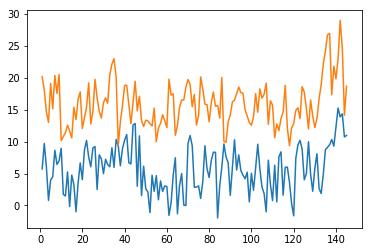

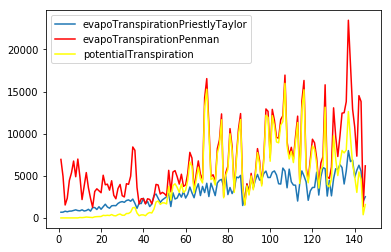

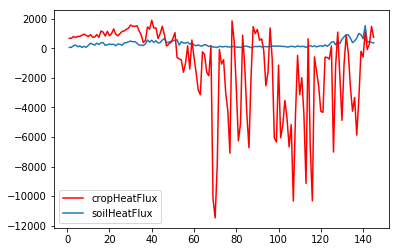

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
def simul_energybalance(minTair,
         maxTair,
         albedoCoefficient,
         stefanBoltzman,
         elevation,
         solarRadiation,
         vaporPressure,
         extraSolarRadiation,
         lambdaV ,
         hslope ,
         psychrometricConstant,
         Alpha,
         vonKarman,
         heightWeatherMeasurements,
         zm ,
         d ,
         zh,
         plantHeight,
         wind ,
         deficitOnTopLayers,
         soilDiffusionConstant,
         VPDair ,
         rhoDensityAir,
         specificHeatCapacityAir,
         tau ,
         tauAlpha ,
         isWindVpDefined, dt,t):
    T_minCanopyTemperature = []
    T_maxCanopyTemperature = []
    T_evapoTranspirationPriestlyTaylor =[]
    T_evapoTranspirationPenman = []
    T_potentialTranspiration = []
    T_soilHeatFlux = []
    T_cropHeatFlux = []
    T_time = []
    file='C:/Users/midingoy/Documents/THESE/pycropml_pheno/test/tutorial/energybalance_pkg/data/WW_scalar.txt'
    import pandas as pd
    df =pd.read_csv(file,header = 0,sep=";",names = ("date","deficitOnTopLayers","minTair","maxTair",
                                                     "solarRadiation","extraSolarRadiation",
                                                     "vaporPressure","tau","hslope",
                                                     "plantHeight","wind" ,"VPDair",
                                                     "isWindVpDefined","Wc_3cm","Ntip")) 
    T_deficitOnTopLayers = df["deficitOnTopLayers"]
    T_minTair = df["minTair"]
    T_maxTair = df["maxTair"]
    T_solarRadiation = df["solarRadiation"]
    T_extraSolarRadiation = df["extraSolarRadiation"]
    T_vaporPressure = df["vaporPressure"]
    T_tau = df["tau"]
    T_hslope = df["hslope"]
    T_plantHeight = df["plantHeight"]
    T_wind= df["wind"]
    T_isWindVpDefined= df["isWindVpDefined"]
    T_Wc_3cm= df["Wc_3cm"]
    T_VPDair= df["VPDair"]
    T_Ntip= df["Ntip"]
    T_date = df["date"]
    n=1
    for t in np.arange(0, 145):
        deficitOnTopLayers = T_deficitOnTopLayers[t]
        minTair = T_minTair[t]
        maxTair = T_maxTair[t]
        solarRadiation = T_solarRadiation[t]
        extraSolarRadiation = T_extraSolarRadiation[t]
        vaporPressure =  T_vaporPressure[t]
        tau = T_tau[t]
        hslope = T_hslope[t]
        plantHeight = T_plantHeight[t]
        wind= T_wind[t]
        isWindVpDefined= T_isWindVpDefined[t]
        Wc_3cm= T_Wc_3cm[t]
        VPDair= T_VPDair[t]
        Ntip= T_Ntip[t]
        
        res = model_energybalance(minTair,
         maxTair,
         albedoCoefficient,
         stefanBoltzman,
         elevation,
         solarRadiation,
         vaporPressure,
         extraSolarRadiation,
         lambdaV ,
         hslope ,
         psychrometricConstant,
         Alpha,
         vonKarman,
         heightWeatherMeasurements,
         zm ,
         d ,
         zh,
         plantHeight,
         wind ,
         deficitOnTopLayers,
         soilDiffusionConstant,
         VPDair ,
         rhoDensityAir,
         specificHeatCapacityAir,
         tau ,
         tauAlpha ,
         isWindVpDefined)
        #netRadiation, netOutGoingLongWaveRadiation, netRadiationEquivalentEvaporation, evapoTranspirationPriestlyTaylor, diffusionLimitedEvaporation,energyLimitedEvaporation, conductance, evapoTranspirationPenman,soilEvaporation, evapoTranspiration, potentialTranspiration, soilHeatFlux,cropHeatFlux, minCanopyTemperature, maxCanopyTemperature = [r for r in res.values()]
        T_minCanopyTemperature.append(res["minCanopyTemperature"])
        T_maxCanopyTemperature.append(res["maxCanopyTemperature"])
        T_evapoTranspirationPriestlyTaylor.append(res["evapoTranspirationPriestlyTaylor"])
        T_evapoTranspirationPenman.append(res["evapoTranspirationPenman"])
        T_potentialTranspiration.append(res["potentialTranspiration"])
        T_cropHeatFlux.append(res["cropHeatFlux"])
        T_soilHeatFlux.append(res["soilHeatFlux"])
        T_time.append(n)
        n=n+1
    return T_time,T_minCanopyTemperature,T_maxCanopyTemperature, T_evapoTranspirationPriestlyTaylor,\
T_evapoTranspirationPenman, T_potentialTranspiration,T_soilHeatFlux,T_cropHeatFlux,

def affichage():
    sim = simul_energybalance(minTair = 0.7,
             maxTair = 7.2,
             albedoCoefficient = 0.23,
             stefanBoltzman = 4.903e-09,
             elevation = 11,
             solarRadiation = 3.0,
             vaporPressure = 6.1,
             extraSolarRadiation = 11.7,
             lambdaV = 2.454,
             hslope = 0.584,
             psychrometricConstant = 0.66,
             Alpha = 1.5,
             vonKarman = 0.41,
             heightWeatherMeasurements = 2.0,
             zm = 0.13,
             d = 0.67,
             zh = 0.013,
             plantHeight = 0.0,
             wind = 124000.0,
             deficitOnTopLayers = 5341.0,
             soilDiffusionConstant = 4.2,
             VPDair = 2.19,
             rhoDensityAir = 1.225,
             specificHeatCapacityAir = 0.00101,
             tau = 0.9983,
             tauAlpha = 0.3,
             isWindVpDefined = 1, dt = 1, t=50)
    T_time,T_minCanopyTemperature,T_maxCanopyTemperature,T_evapoTranspirationPriestlyTaylor,\
    T_evapoTranspirationPenman,T_potentialTranspiration,T_soilHeatFlux,T_cropHeatFlux = [s for s in sim]
    mp.plot(T_time,T_minCanopyTemperature)
    mp.plot(T_time,T_maxCanopyTemperature)
    mp.show()
    evPrie, = mp.plot(T_time,T_evapoTranspirationPriestlyTaylor, label ='evapoTranspirationPriestlyTaylor' )
    evP, = mp.plot(T_time,T_evapoTranspirationPenman, color="red",label='evapoTranspirationPenman')
    potT, = mp.plot(T_time,T_potentialTranspiration, color="yellow",label='potentialTranspiration')
    mp.legend([evPrie, evP, potT],['evapoTranspirationPriestlyTaylor', 'evapoTranspirationPenman','potentialTranspiration'])
    mp.show()
    soilH, = mp.plot(T_time,T_soilHeatFlux, label ='soilHeatFlux' )
    cropH, = mp.plot(T_time,T_cropHeatFlux, color="red",label='cropHeatFlux')
    mp.legend([cropH,soilH],['cropHeatFlux', 'soilHeatFlux'])

    
affichage()

In [5]:
sim = simul_energybalance(minTair = 0.7,
             maxTair = 7.2,
             albedoCoefficient = 0.23,
             stefanBoltzman = 4.903e-09,
             elevation = 0.0,
             solarRadiation = 3.0,
             vaporPressure = 6.1,
             extraSolarRadiation = 11.7,
             lambdaV = 2.454,
             hslope = 0.584,
             psychrometricConstant = 0.66,
             Alpha = 1.5,
             vonKarman = 0.42,
             heightWeatherMeasurements = 2.0,
             zm = 0.13,
             d = 0.67,
             zh = 0.013,
             plantHeight = 0.0,
             wind = 124000.0,
             deficitOnTopLayers = 5341.0,
             soilDiffusionConstant = 4.2,
             VPDair = 2.19,
             rhoDensityAir = 1.225,
             specificHeatCapacityAir = 0.00101,
             tau = 0.9983,
             tauAlpha = 0.3,
             isWindVpDefined = 1, dt = 1, t=50)

In [49]:
a=[[2,3,
  ]]

In [50]:
a

[[2, 3]]

In [85]:
def test(a,b):
    res = {"a":10,"b":20}
    return res

In [86]:
g = test(10,20)

In [87]:
g

{'a': 10, 'b': 20}

In [90]:
a, b=[r for r in g.values()]


In [91]:
a


10

In [92]:
b

20